# Проект  Машинное обучение - "Прогноз вероятности оттока клиентов фитнес-центров «Культурист-датасаентист»"

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

### Цель проекта

Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.

### Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

**Данные клиента за предыдущий до проверки факта оттока месяц**:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент  в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента**:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import warnings
warnings.filterwarnings('ignore')
%autosave 30

Autosaving every 30 seconds


In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных

### Посмотрим на датасет. Изучим средние значения и стандартные отклонения (пригодится метод describe())

In [3]:
# напишем функцию для просмотра данных
def first_look(df):
    print('---------------------------Первые 5 строк----------------------------')
    display(df.head())
    print(' ')
    print(' ')
    print('--------------Общая информация--------------')
    print(' ')
    print(df.info())
    print(' ')
    print('-------------Пропуски------------- ')
    print(' ')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
    if count == 0:
        print(' ')
        print('Пропусков НЕТ')
    print(' ')
    print('-------------Дубликаты------------ ')
    print(' ')
    if df.duplicated().sum() > 0:
        print(' ')
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')
    print(' ')  

In [4]:
first_look(df)

---------------------------Первые 5 строк----------------------------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_c

**Все данные полные. Пропусков и дубликатов нет, типы данных - корректные.**

In [5]:
# приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [6]:
# транспонируем таблицу для более удобного просмотра
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Поскольку большинство признаков бинарные 0 и 1, то можно рассматривать среднее, как % долю.

- Разделение по полу примерно одинаковое - 51%
- Проживающих и работающих недалеко от фитнес-клуба - 84,5%
- Сотрудников компании-партнёра клуба - 48,6%
- По акции «приведи друга» - 30,8%
- Оставивших контактный телефон - 90,3%
- Средняя длительность текущего действующего абонемента в среднем - 4,7 месяца
- Посещяющих групповые занятия - 41,2%
- Средний возраст - 29,2 года
- Средняя суммарная выручка от дополнительных услуг фитнес-центра - 147
- Средний срок до окончания текущего действующего абонемента - 4,3 месяца
- Среднее время с момента первого обращения в фитнес-центр - 3,7 месяца
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1,88
- Средняя частота посещений в неделю за предыдущий месяц - 1,77
- Факт оттока в текущем месяце - 26,5%

### Посмотрим на средние значения признака "churn" — тех, кто ушел в отток и тех, кто остался 

In [7]:
df_churn = df.groupby('churn').agg({'mean'}).T

In [8]:
df_churn

,churn,0,1
gender,mean,0.510037,0.510839
near_location,mean,0.873086,0.768143
partner,mean,0.534195,0.355325
promo_friends,mean,0.353522,0.183789
phone,mean,0.903709,0.902922
contract_period,mean,5.747193,1.728558
group_visits,mean,0.464103,0.268615
age,mean,29.976523,26.989632
avg_additional_charges_total,mean,158.445715,115.082899
month_to_end_contract,mean,5.283089,1.662582


In [9]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

- По полу примерно одинаково ушло и осталось мужчин и женщин ~ 51%
- Проживающих и работающих недалеко от фитнес-клуба - 87,3% среди оставшихся и 76,8% среди ушедших
- Сотрудников компании-партнёра клуба - 53,4% среди оставшихся и 35,5% среди ушедших
- По акции «приведи друга» - 35,3% среди оставшихся и 18,4% среди ушедших
- Оставивших контактный телефон - 90,3% среди оставшихся и 90,2% среди ушедших
- Средняя длительность текущего действующего абонемента в среднем - 5,7 месяца среди оставшихся и 1,7 месяца среди ушедших
- Посещяющих групповые занятия - 46,4% среди оставшихся и 26,9% среди ушедших
- Средний возраст - 30 лет среди оставшихся и 27 лет среди ушедших
- Средняя суммарная выручка от дополнительных услуг фитнес-центра - 158,4 среди оставшихся и 115,1 среди ушедших
- Средний срок до окончания текущего действующего абонемента - 5,3 месяца среди оставшихся и 1,7 месяца среди ушедших
- Среднее время с момента первого обращения в фитнес-центр - 4,7 месяца среди оставшихся и 1 месяц среди ушедших
- Средняя частота посещений в неделю за все время с начала действия абонемента - 2 среди оставшихся и 1,5 среди ушедших
- Средняя частота посещений в неделю за предыдущий месяц - 2 среди оставшихся и 1 среди ушедших

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

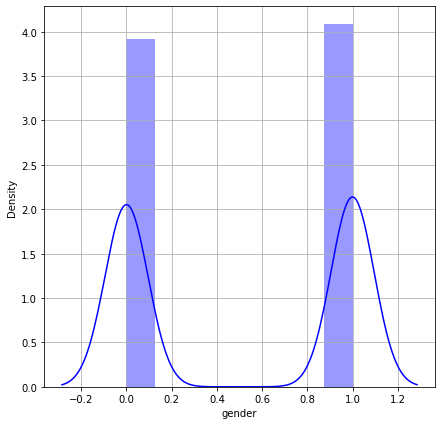

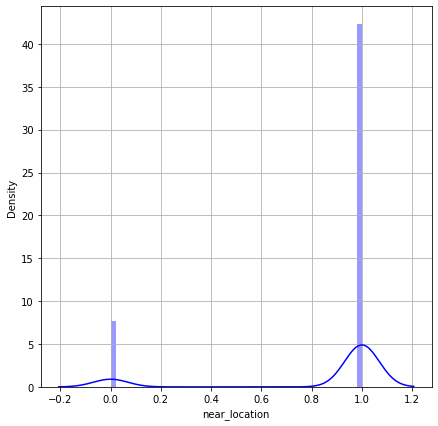

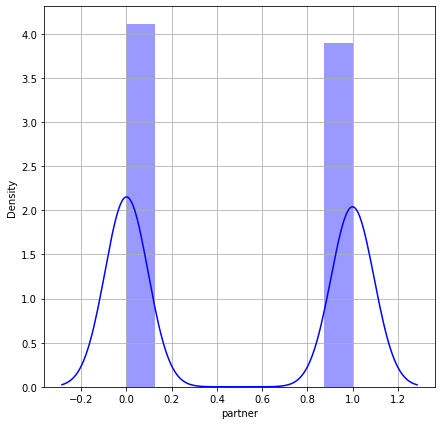

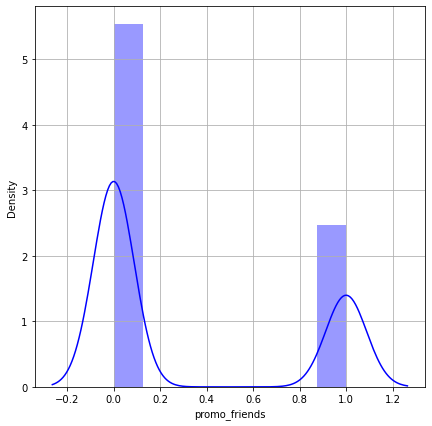

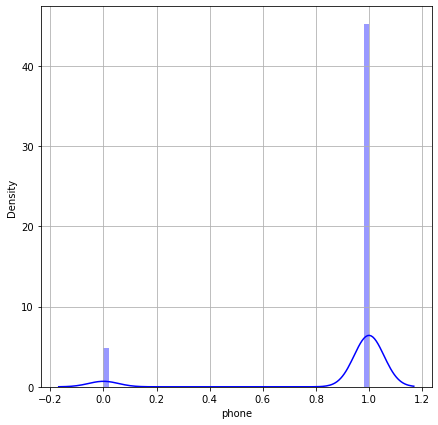

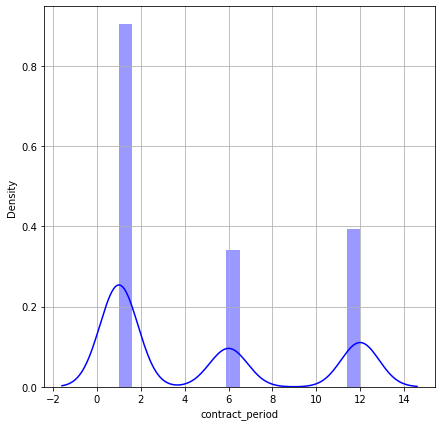

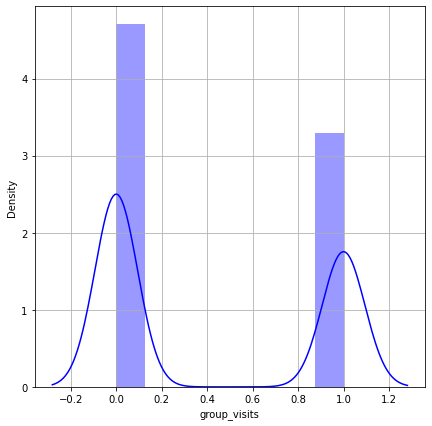

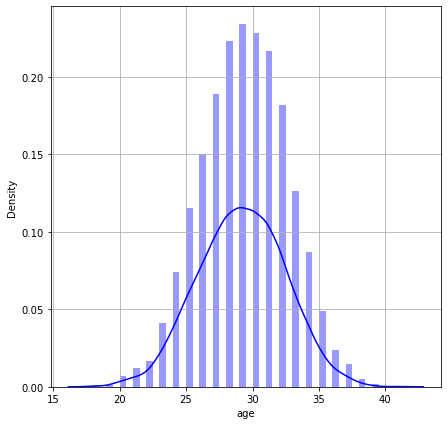

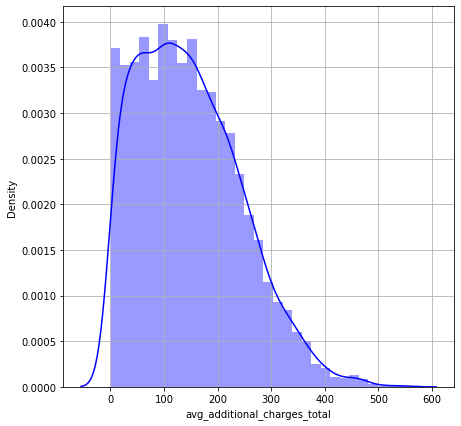

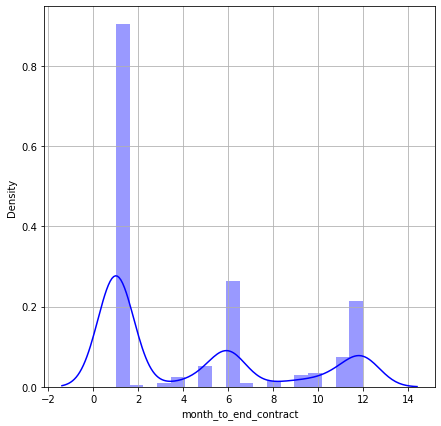

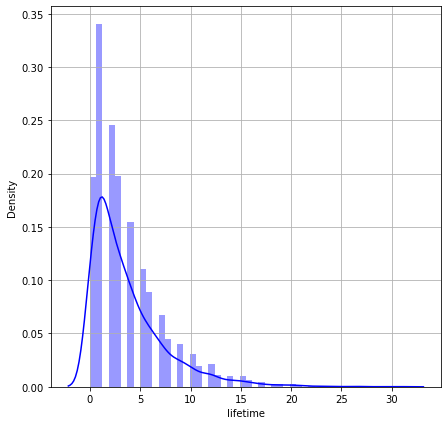

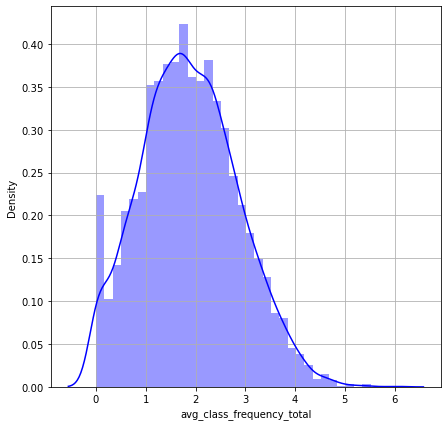

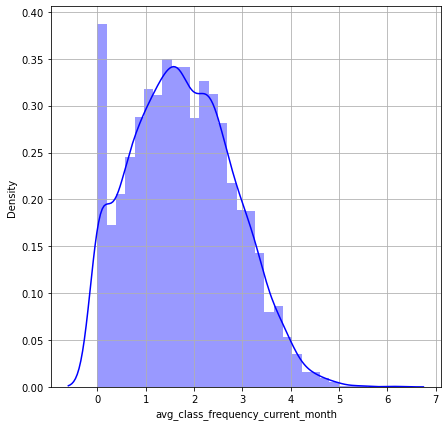

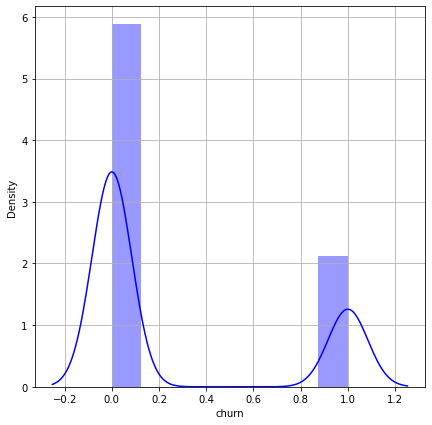

In [10]:
# используем цикл для каждого признака
for column in df.columns:
    plt.figure(figsize=(7,7))
    df.groupby('churn')[column]
    sns.distplot(df[column], kde=True, color="blue")
    plt.grid()
    plt.show()

- Распределение по полу примерно 50/50;
- Проживающих и работающих недалеко от фитнес-клуба, из тех кто ушёл, в несколько раз больше, т.к. их вообще большинство;
- Сотрудников компании-партнёра клуба немного больше из тех кто остаётся;
- По акции «приведи друга» в 2 раза меньше среди ушедших;
- Оставивших контактный телефон абсолютное большинство среди ушедших;
- Длительность текущего действующего абонемента 1-2 месяца;
- Посещяющих групповые занятия больше среди тех кто остаётся;
- Математическое ожидание по возрасту 29 лет; 
- Время с момента первого обращения в фитнес-центр на пике 1-2 месяца;
- Частота посещений в неделю до 5 дней;
- Оставшихся на много больше, чем тех кто ушёл.

### Построим матрицу корреляций и тепловую карту для неё

In [11]:
df_corr = df.corr()
df_corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


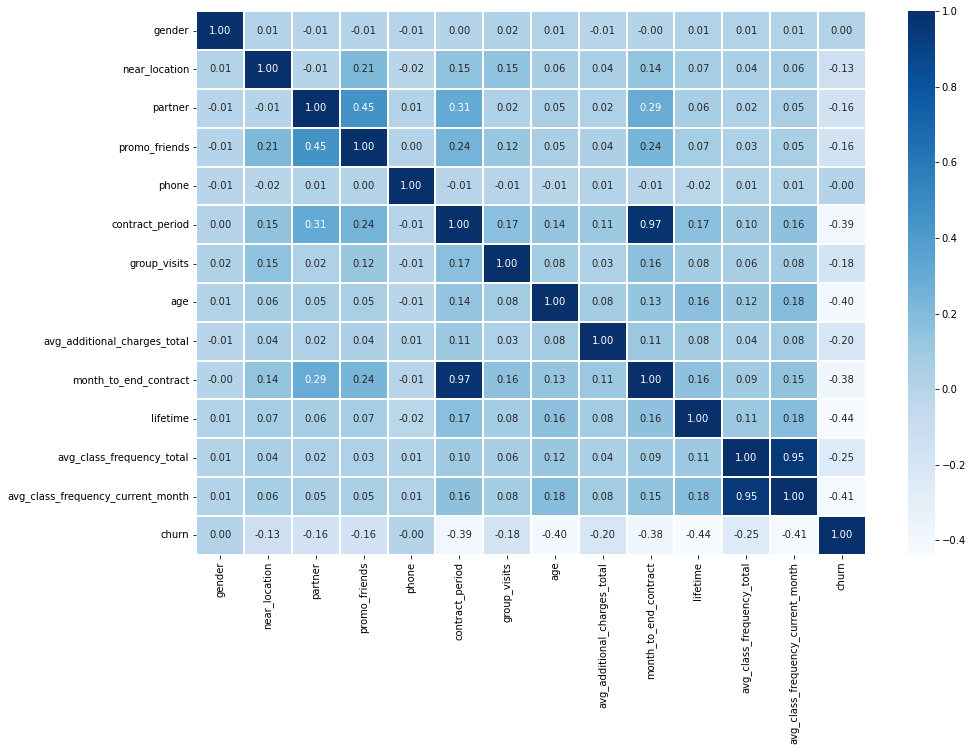

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,fmt='0.2f',linewidths=2, cmap="Blues")
plt.show()

**Резко выделяются мультиколлинеарные признаки:**

- "month_to_end_contract" и "contract_period", коллерирующие с коэффициентом - 0,97;

- "avg_class_frequency_current_month" и "avg_class_frequency_total", коллерирующие с коэффициентом -0.95.


## Модель прогнозирования оттока клиентов

### Создадим модели бинарной классификации клиентов, где целевой признак — "churn"

In [13]:
# избавимся от мультиколлинеарных признаков
df_new = df.drop(['contract_period','avg_class_frequency_current_month'], axis=1)

In [14]:
df_new.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
       'churn'],
      dtype='object')

In [15]:
# разделим данные на признаки и целевую переменную
X = df_new.drop('churn', axis=1)
y = df_new['churn']

In [16]:
# разделим модель на обучающую и валидационную выборки функцией train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# зададим алгоритм на основе логистической регрессии
model = LogisticRegression(solver='liblinear')

# обучите модель
model.fit(X_train, y_train)

# воспользуемся обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

# оценим метрики accuracy, precision и recall на валидационной выборке
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall:    {:.4f}'.format(recall_score(y_test, predictions)))

Accuracy:  0.88
Precision: 0.76
Recall:    0.7727


In [18]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) 

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# обучим модель случайного леса
rf_model.fit(X_train_st,y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

# оценим метрики accuracy, precision и recall на валидационной выборке
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall:    {:.4f}'.format(recall_score(y_test, rf_predictions)))

Accuracy:  0.90
Precision: 0.80
Recall:    0.7727


**Модель на основе алгоритма "случайный лес" показала себя лучше на основании метрик Accuracy и Precision. Полнота обнаружения - Recall у моделей одинаковая.**

## Кластеризация клиентов

### Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму.

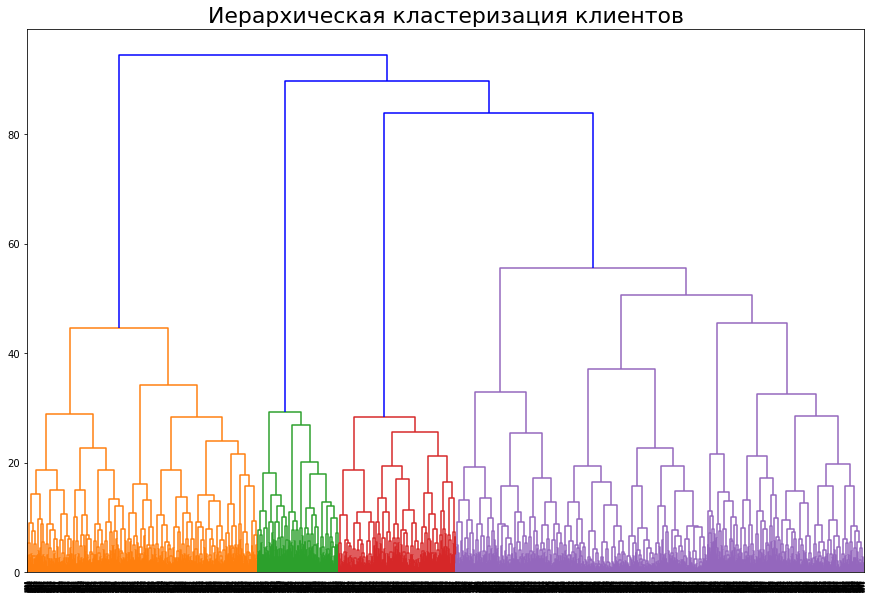

In [19]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# построим матрицу расстояний
linked = linkage(X_sc, method = 'ward') 

# визуализируем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', above_threshold_color='blue')
plt.title('Иерархическая кластеризация клиентов', fontsize=22)
plt.show() 

**На основании полученной дендрограммы можно выделить 4 класса**

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5.

In [20]:
# зададим модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# сохраним метки кластера в поле нашего датасета
df_new['cluster_km'] = labels

### Посмотрим на средние значения признаков для кластеров. 

In [21]:
# выведем статистику по средним значениям наших признаков по кластеру
clusters_t = df_new.groupby('cluster_km').agg('mean').T
clusters_t

cluster_km,0,1,2,3,4
gender,0.498501,0.500898,0.521158,0.512090,0.523316
near_location,0.995005,0.000000,0.995546,1.000000,0.862694
partner,0.889111,0.488330,0.417595,0.196891,0.471503
promo_friends,1.000000,0.077199,0.011136,0.053541,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
group_visits,0.519481,0.231598,0.546771,0.297064,0.427461
age,29.543457,28.685817,30.805122,27.818653,29.297927
avg_additional_charges_total,152.139417,137.277472,177.103564,124.625600,144.208179
month_to_end_contract,6.265734,2.804309,6.162584,1.898964,4.466321
lifetime,4.210789,2.978456,5.701559,2.058722,3.940415


In [22]:
df_new['cluster_km'].value_counts()

3    1158
0    1001
2     898
1     557
4     386
Name: cluster_km, dtype: int64

**По бинарным признакам видно:**

- алгоритм выделил проживающиих и работающих рядом с фитнес-центром в 3й кластер, остальных в 1й;

- пришедших в рамках акции «приведи друга» в 0й кластер;

- не оставивших контактный номер телефона в 4й кластер;

### Построим распределения признаков для кластеров

In [23]:
clusters = df_new.groupby('cluster_km').agg('mean')
clusters

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


In [24]:
df_new.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
       'churn', 'cluster_km'],
      dtype='object')

 используем цикл для визуализации распределения признаков по кластерам
for column in df_new.columns:
    plt.figure(figsize=(12,7))
    sns.countplot(data=df_new, x = df_new[column], hue='cluster_km', palette="Blues")
    plt.title(column)
    plt.grid()
    plt.show()

 посмотрим на численное распределение
for column in df_new:
    print(df_new[column].value_counts())

### Визуализируем распределения категориальных признаков для каждого кластера.

In [25]:
df_new.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
       'churn', 'cluster_km'],
      dtype='object')

Кластер 0


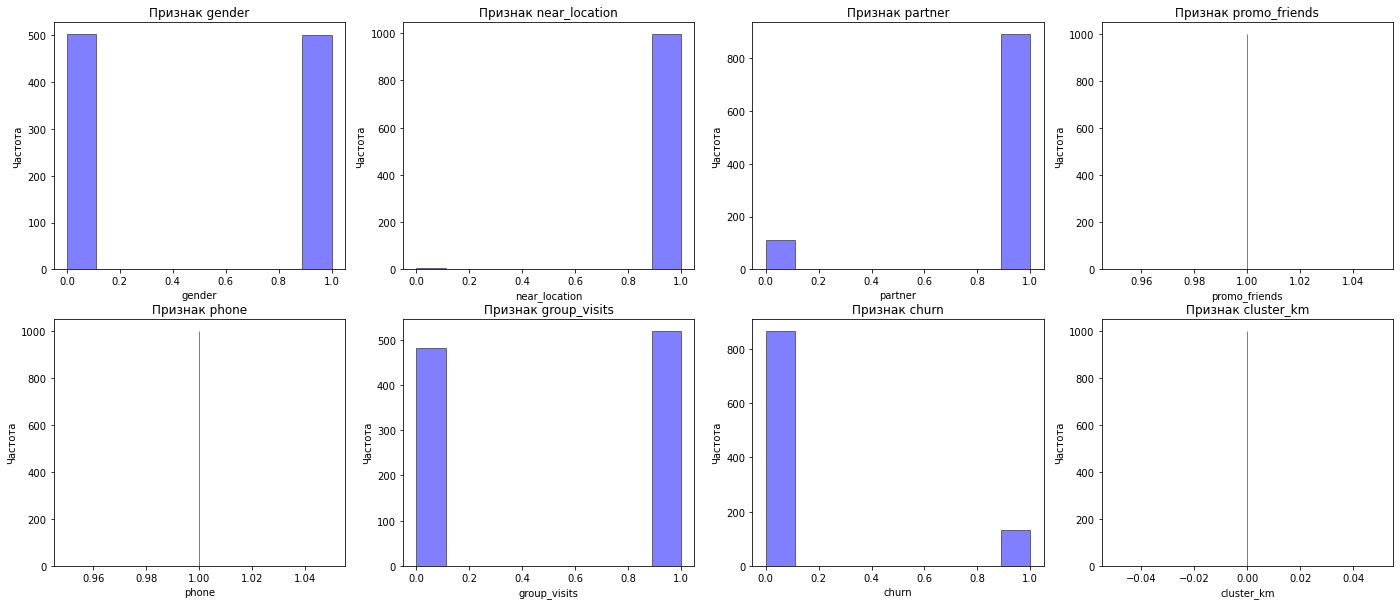

Кластер 1


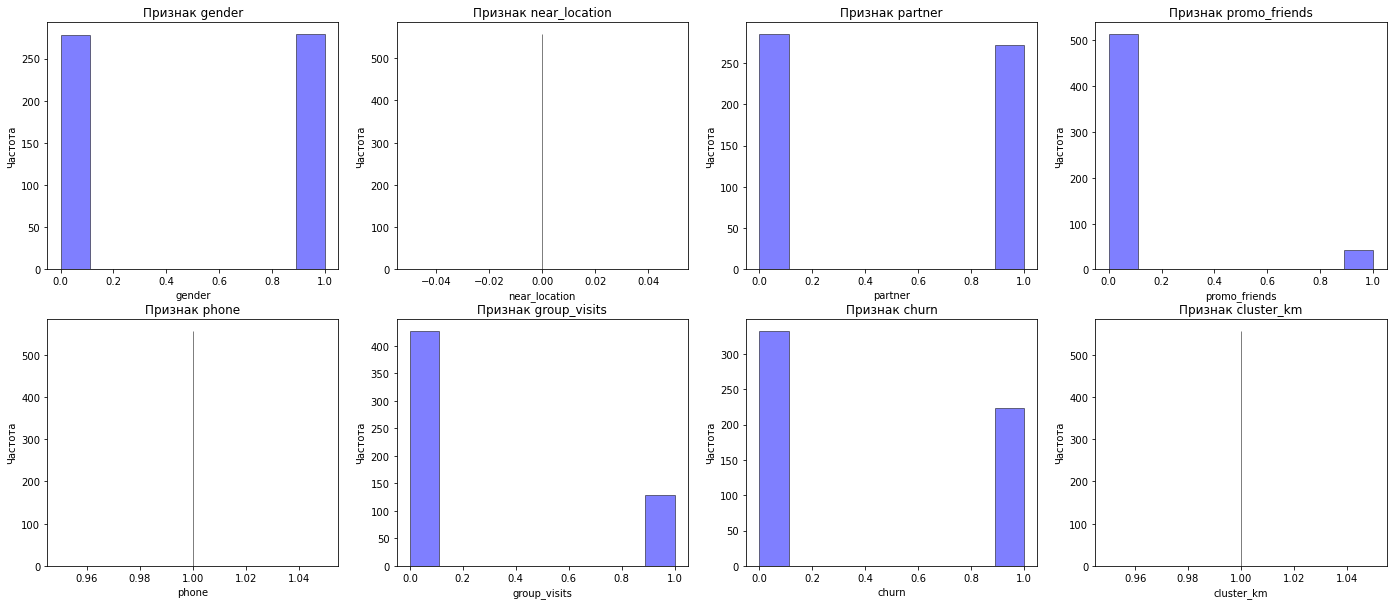

Кластер 2


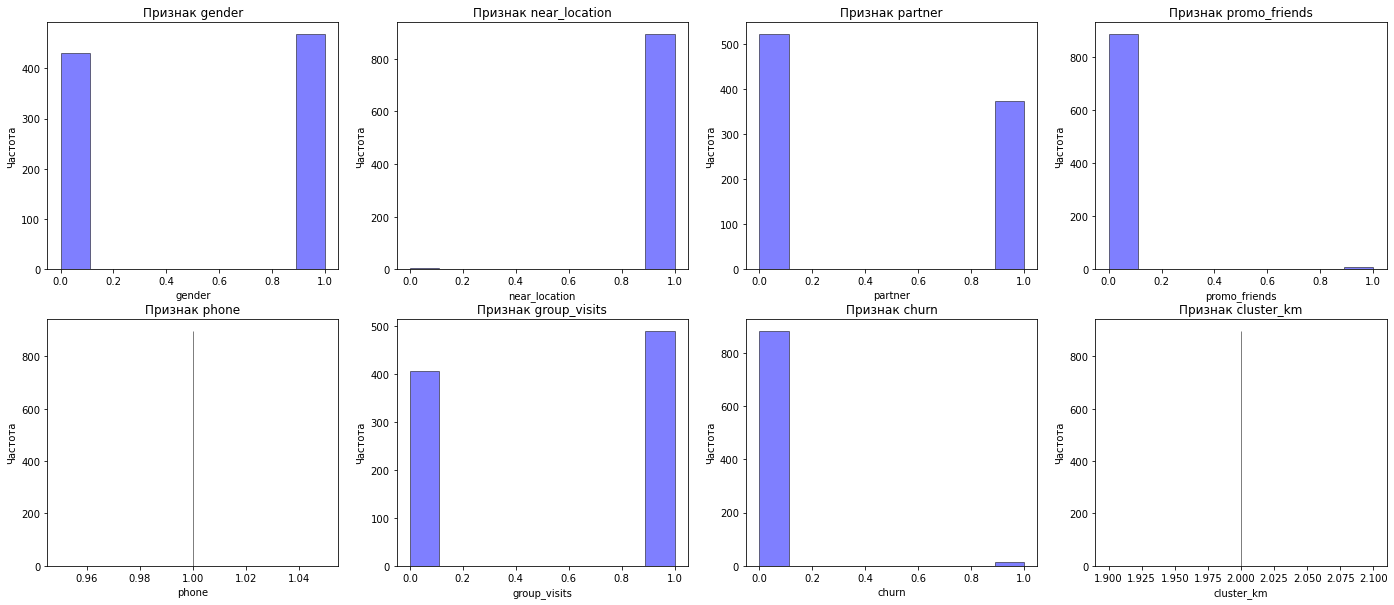

Кластер 3


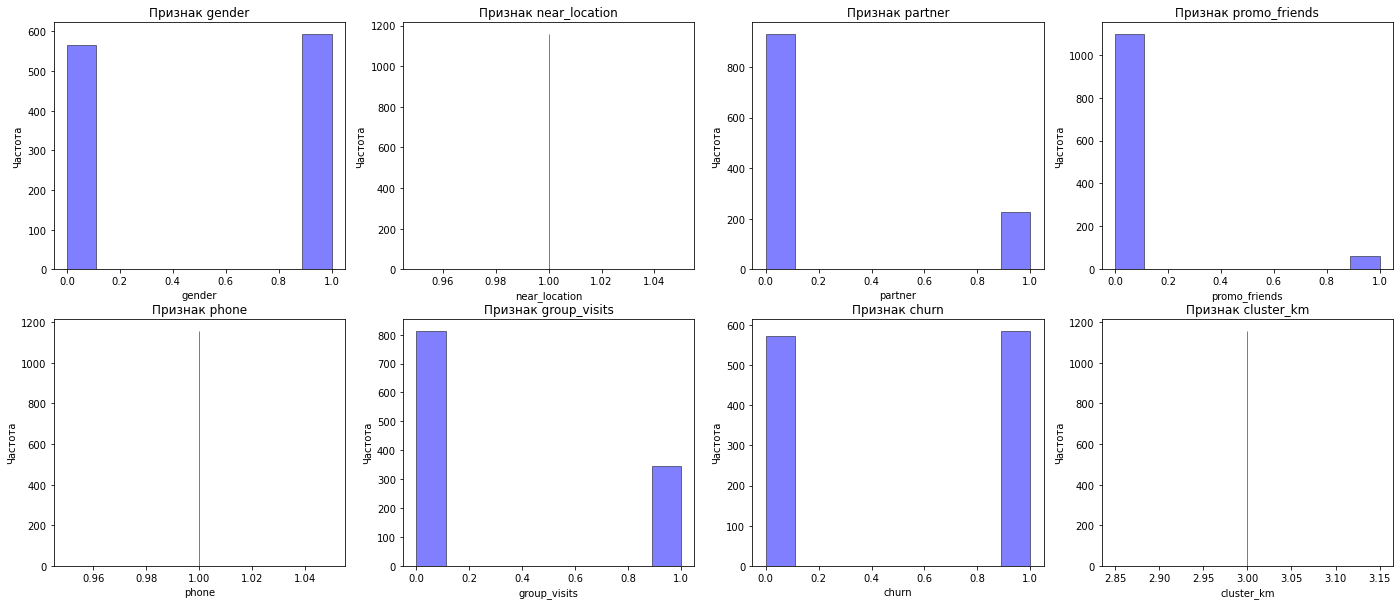

Кластер 4


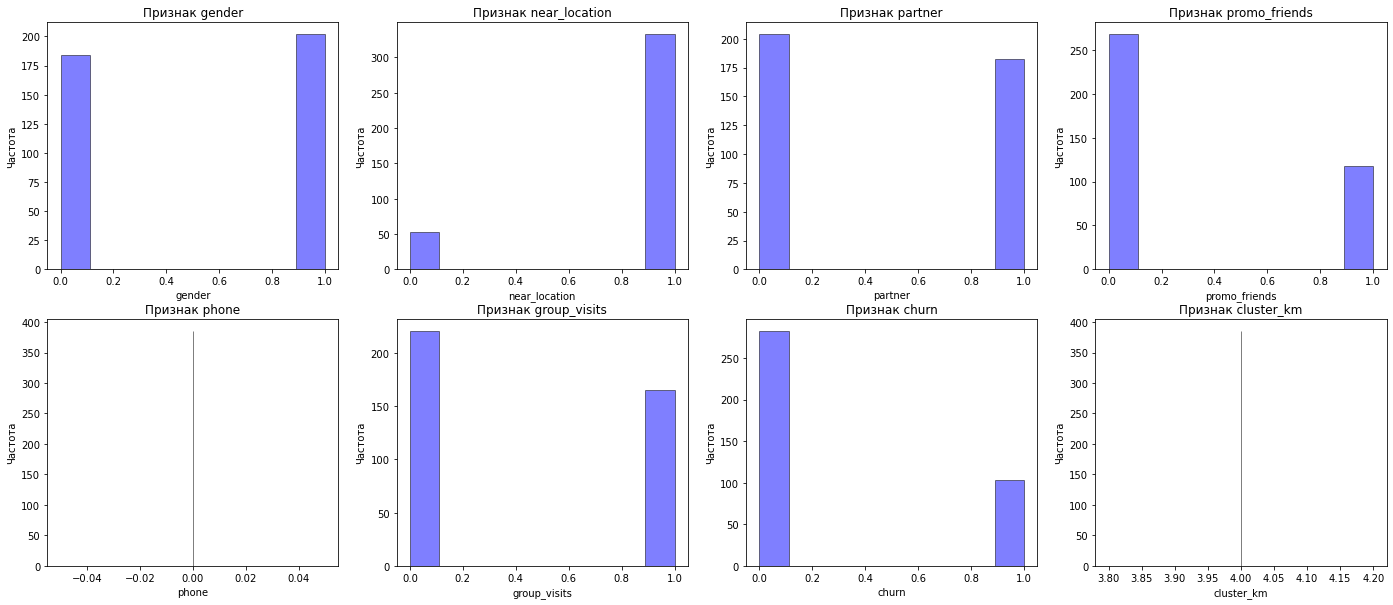

In [26]:
# выделим категориальные признаки
categorical = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'churn', 'cluster_km']

# используем цикл для построения графиков
for j in sorted(df_new['cluster_km'].unique()):
    print("Кластер {}".format(j))
    fig, ax = plt.subplots(2, 4, figsize=(24, 10))
    df_cluster_1 = df_new[df_new['cluster_km'] == j]
    r=0
    k=0
    for column in categorical:
        min_value = min(df_cluster_1[column])
        max_value = max(df_cluster_1[column])
        bins_range = np.linspace(min_value, max_value, 10) 
        ax[r,k].hist(df_cluster_1[column],
                        bins=bins_range, 
                        alpha=0.5, 
                        ec='black',
                        color="Blue"                        
                        )
        ax[r,k].set_ylabel('Частота')
        ax[r,k].set_xlabel(str(column))
        ax[r,k].set_title('Признак '+ str(column))
        if k == 3:
            k = 0
            r = r+1
        else:
            k = k+1
    plt.show()

**Выделяющиеся категориальные признаки:**

**Кластер 0**
- 'near_location', 'promo_friends' и 'phone' среди ушедших;


**Кластер 1**
- 'near_location' среди тех кто остался и 'phone' среди ушедших;


**Кластер 2**
- 'promo_friends' среди тех кто остался, 'phone' среди ушедших и 'churn' в основном среди оставшихся;

**Кластер 3**
- 'near_location' среди ушедших, 'promo_friends' больше тех кто остался и 'phone' среди ушедших;


**Кластер 4**
- 'phone' среди ушедших;

### Визуализируем распределения числовых признаков для каждого кластера

Кластер 0


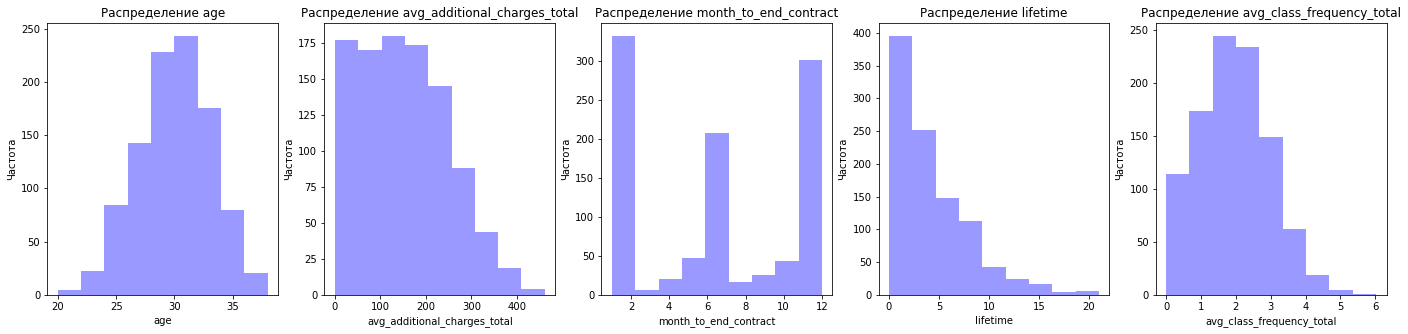

Кластер 1


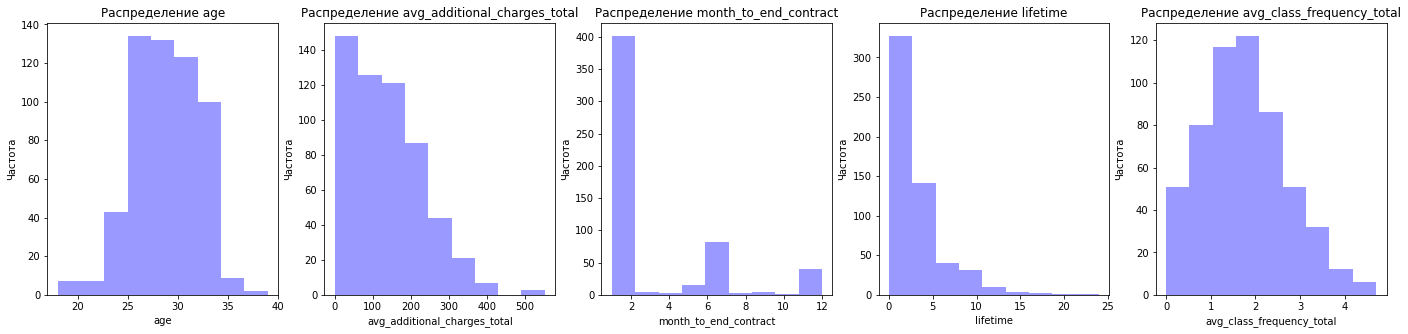

Кластер 2


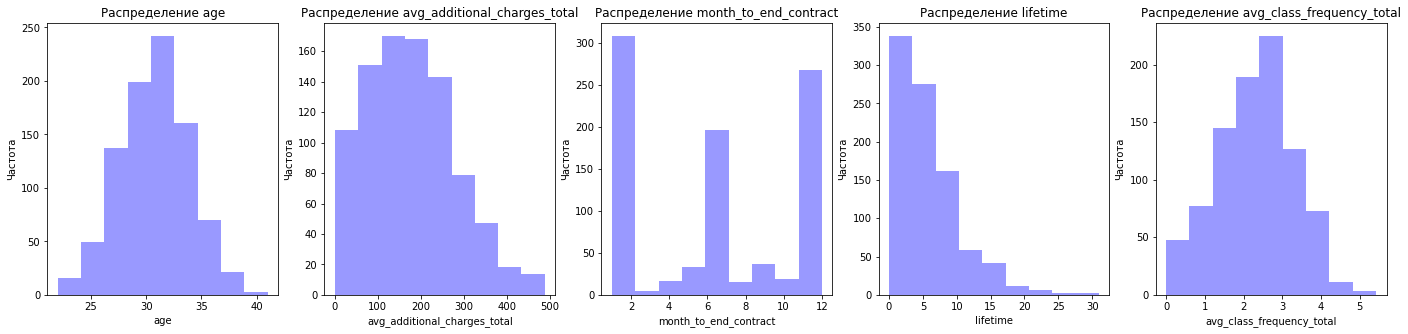

Кластер 3


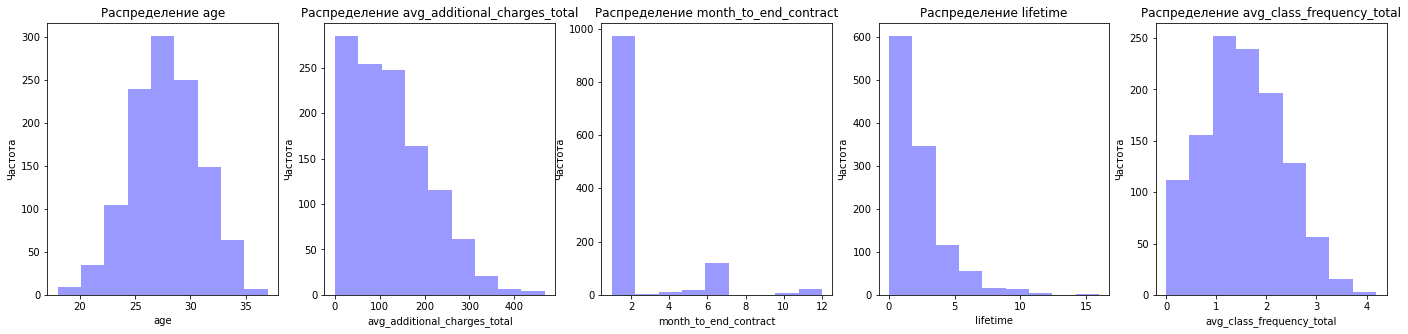

Кластер 4


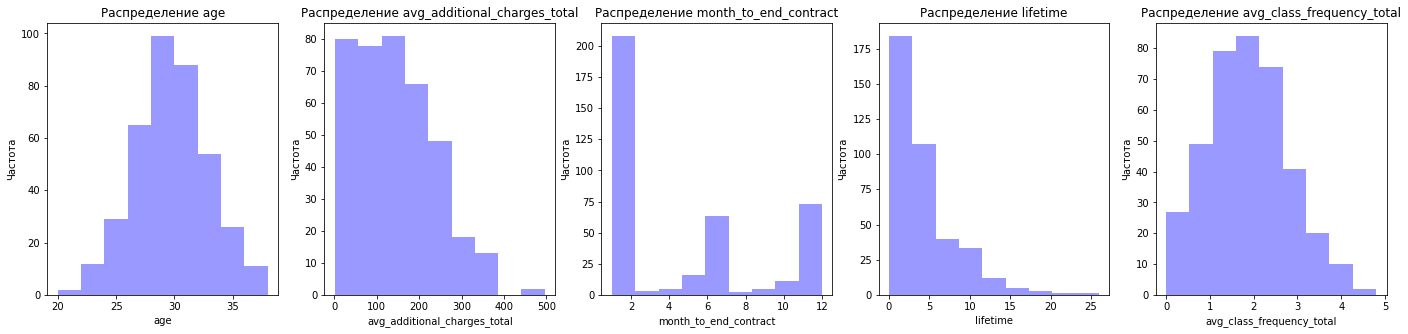

In [27]:
# выделим числовые признаки
numeric = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total']

# используем цикл для построения графиков
for j in sorted(df_new['cluster_km'].unique()):
    print("Кластер {}".format(j))
    fig, ax = plt.subplots(1, 5, figsize=(24, 5))
    df_cluster_2 = df_new[df_new['cluster_km'] == j]
    k=0
    for column in numeric:
        min_value = min(df_cluster_2[column])
        max_value = max(df_cluster_2[column])
        bins_range = np.linspace(min_value, max_value, 10) 
        sns.distplot(df_cluster_2[column], kde=False, ax=ax[k], color='Blue', bins = bins_range)
        ax[k].set_ylabel('Частота')
        ax[k].set_xlabel(str(column))
        ax[k].set_title('Распределение '+ str(column))
        k = k+1
    plt.show()

In [28]:
df_new.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
       'churn', 'cluster_km'],
      dtype='object')

**Выделяющиеся категориальные признаки:**

**Кластер 0**
- 'age' 25-35 лет, 'lifetime' до 15 месяцев;

**Кластер 2**
- 'age' 27-34 лет, 'lifetime' до 24 месяцев;

**Кластер 3**
- 'age' 25-30 лет, 'lifetime' до 10 месяцев и большинство 'month_to_end_contract' 1-2 месяцев;


### Для каждого полученного кластера посчитаем долю оттока

In [29]:
# сгруппируем по кластеру и посчитаем кол-во клиентов в каждом и кол-во ушедших
df_cluster =df_new.groupby('cluster_km').agg({'gender':'count', 'churn':'sum'})
df_cluster.columns = ['count_users', 'churn_users']

# посчитаем долю оттока
df_cluster['churn_users_perc'] = round(df_cluster['churn_users'] / df_cluster['count_users'] * 100)
df_cluster['churn_perc_total'] = round(df_cluster['churn_users'] / 4000 * 100, 2)
df_cluster.reset_index()
df_cluster.sort_values(by='churn_users_perc', ascending=False)

,count_users,churn_users,churn_users_perc,churn_perc_total
cluster_km,,,,
3,1158,586,51.0,14.65
1,557,224,40.0,5.60
4,386,103,27.0,2.58
0,1001,133,13.0,3.32
2,898,15,2.0,0.38


**Кластер 4 уступает Кластеру 0 во внутренней доле оттока 27% против 13%, но выигрывает по отношению к общему числу клиентов 2.58% против 3.32%. TOP-3 по надёжности Кластеры № 2, 0 и 4.**

## Выводы:

На основании полученных данных можно выделить 3 группы клиентов:

- **Группа №1** - абсолютный лидер с минимальным оттоком - **Кластер 2**;

- **Группа №2** - схожие по оттоку по отношению к общему числу клиентов - **Кластер 0** и **Кластер 4**;

- **Группа №3** - аутсайдеры с внутренним оттоком в 40% и 51% - **Кластер 1** и **Кластер 3**.


**Группа №1** характеризуется:

- возраст 27-34 лет;
- время с момента первого обращения в фитнес-центр в основном 10 месяцев;
- проживание или работа рядом с фитнес-центром;
- большое количество клиентов, у которых до окончания 6 и 12 месяцев;
- большая суммарная выручка от других услуг фитнес-центра;
- участием в акции «приведи друга».

**Группа №2** характеризуется:

- возрастом 27-34 лет;
- время с момента первого обращения в фитнес-центр в основном 10 месяцев;
- большое количество сотрудников компании-партнёра клуба.

**Группа №3** характеризуется:

- возрастом 24-32 лет;
- небольшое количество клиентов проживающих или работающих рядом с фитнес-центром;
- большое количество клиентов, у которых до окончания 1-2 месяца;
- время с момента первого обращения в фитнес-центр в основном 4 месяца;
- небольшое количество сотрудников компании-партнёра клуба;
- небольшое количество посещения групповых занятий.

## Рекомендации:

- **Обратить внимание на то, что у более 50% клиентов абонементы заканчиваются через 1 месяц. Продумать для них скидки и другие бонусы**;
- **Ввести акции на групповые занятия**;
- **Развивать бонусы для компании-партнёра клуба**;
- **Улучшение качества оказываемых услуг, т.к. у многих ушедших, время с момента первого обращения в фитнес-центр было около 4 месяцев**.